In [108]:
from poenta.jitted import R_matrix,large_squeezing
import numpy as np
import matplotlib.pyplot as plt

In [164]:
from scipy.special import factorial as fac
def coherent_state(alpha,cutoff):
    state = np.zeros(cutoff, dtype=np.complex128)
    for m in range(cutoff):
        state[m] = np.exp(-np.abs(alpha)**2/2)*alpha**m/np.sqrt(fac(m))
    return state

In [176]:
gamma = 0
phi = 0
# z = 5+5j
cutoff = 100
old_state = coherent_state(5,cutoff)

In [187]:
x = np.linspace(0.001,3,num= 5000)
errors = []
for x1 in x:
    z = x1 + 1j*x1
    squeezing_real = R_matrix(gamma, phi, z, cutoff, old_state)[:,0]
    squeezing_approxi = large_squeezing(gamma, phi, z, cutoff, old_state)[:,0]
    norm_approxi = np.linalg.norm(squeezing_approxi)
    error = np.sqrt(np.sum(np.abs(squeezing_real - squeezing_approxi)**2))
    if norm_approxi > 0.98:
        errors.append(error)
    else:
        print(x1,norm_approxi)
        break
#     errors.append(error)

0.001 3.7735286669663667e-06


Text(0, 0.5, 'Euclidean Distance')

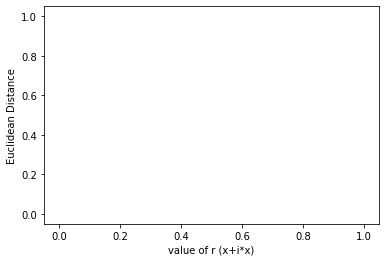

In [188]:
plt.plot(errors)
plt.xlabel("value of r (x+i*x)")
plt.ylabel("Euclidean Distance")
